**2_2_1**

In [ ]:
cats_dogs = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs.csv', axis=)

In [ ]:
cats_dogs=cats_dogs.drop('Unnamed: 0', axis=1).rename(columns= {'Шерстист':'X_1','Гавкает':'X_2','Лазает по деревьям':'X_3','Вид':'Y'})

In [ ]:
cats_dogs

,X_1,X_2,X_3,Y
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик


In [ ]:
X = cats_dogs[['X_1','X_2','X_3']]
y = cats_dogs.Y

In [ ]:
clf_dog_cat = tree.DecisionTreeClassifier(criterion='entropy')

In [ ]:
clf_dog_cat.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5, 0.75, 'x[1] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]')]

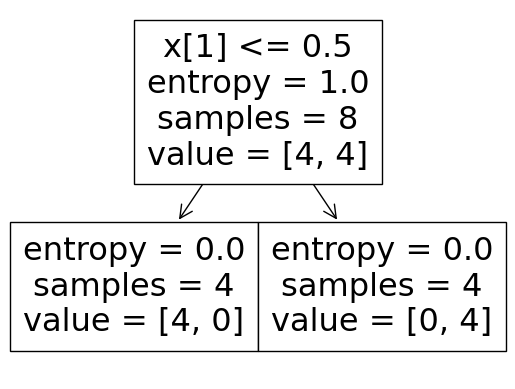

In [ ]:
tree.plot_tree(clf_dog_cat)

**2_2_2**

In [ ]:
dogs = pd.read_csv("https://stepik.org/media/attachments/course/4852/dogs.csv", index_col=0)

dogs_X = dogs.iloc[:, :3]
dogs_y = dogs.iloc[:, 3]

[Text(0.5, 0.75, 'Гавкает <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]')]

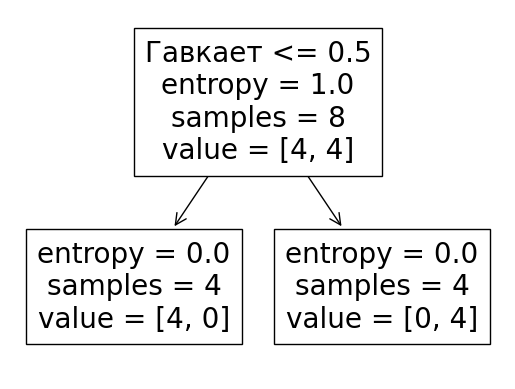

In [ ]:
dogs_clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
dogs_clf.fit(dogs_X, dogs_y)

tree.plot_tree(dogs_clf, feature_names=dogs_X.columns)

In [ ]:
import math as m

In [ ]:
E_sh_sob=(1/1)*m.log2((1/1)) - 0
E_sh_kot=-(4/9)*m.log2((4/9)) - (5/9)*m.log2((5/9))
E_gav_sob=0 - (5/5)*m.log2((5/5))
E_gav_kot=-(4/5)*m.log2((4/5)) - (1/5)*m.log2((1/5))
E_laz_sob=0 - (6/6)*m.log2((6/6))
E_laz_kot=-(4/4)*m.log2((4/4)) - 0

In [ ]:
print(E_sh_kot)
print(E_sh_sob)
print(E_gav_kot)
print(E_gav_sob)
print(E_laz_kot)
print(E_laz_sob)

0.9910760598382222
0.0
0.7219280948873623
0.0
-0.0
0.0


In [ ]:
from math import log,e
import numpy as np

In [ ]:
def entropy2(labels, base=None):

  n_labels = len(labels)

  if n_labels <= 1:
    return 0

  value,counts = np.unique(labels, return_counts=True)
  probs = counts / n_labels
  n_classes = np.count_nonzero(probs)

  if n_classes <= 1:
    return 0

  ent = 0.

  base = e if base is None else base
  for i in probs:
    ent -= i * log(i, base)

  return ent

In [ ]:
print(entropy2())

[Text(0.5, 0.75, 'x[1] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]')]

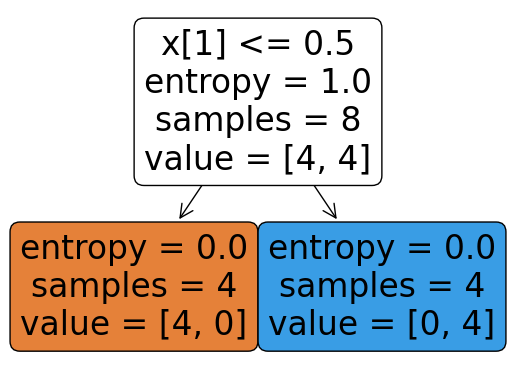

In [ ]:
clf2 = tree.DecisionTreeClassifier(criterion='entropy')

clf2.fit(X, y)

tree.plot_tree(clf2, rounded=True, filled=True)

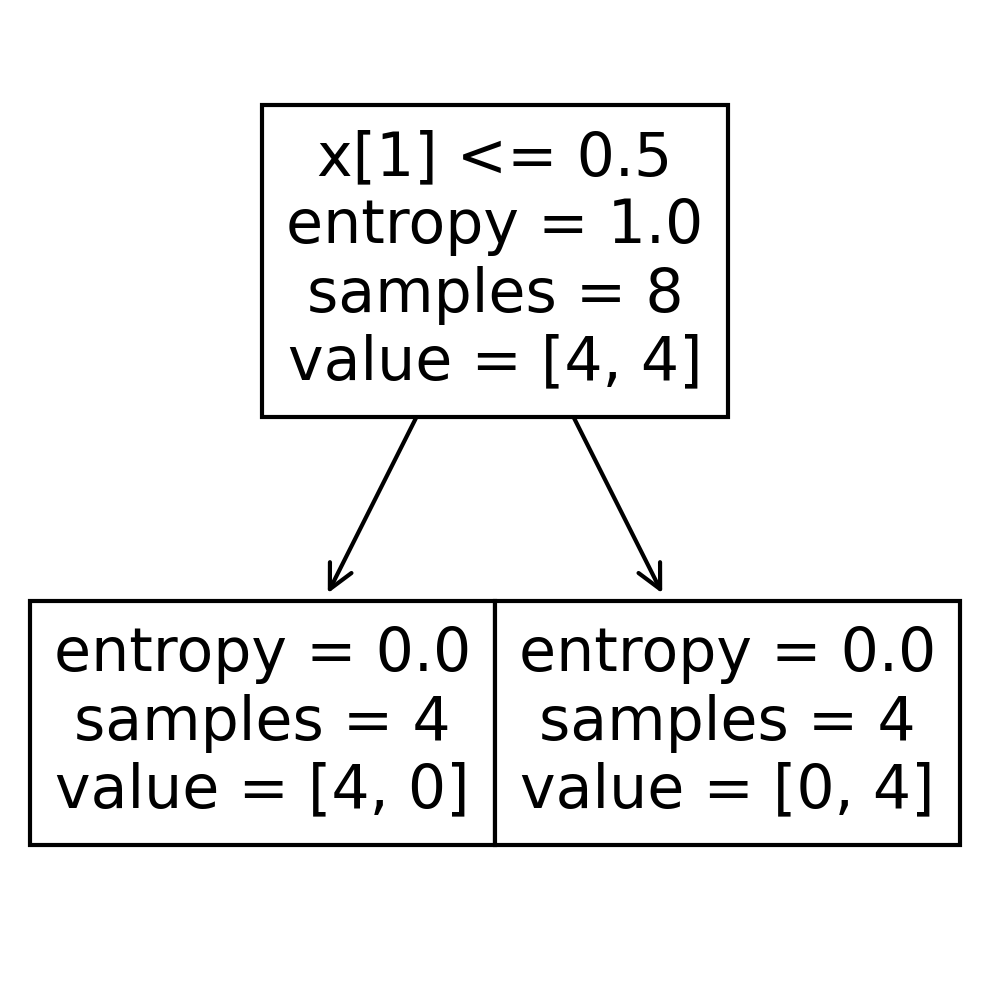

In [ ]:
ig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)
tree.plot_tree(clf2, ax=axes)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import pandas as pd

In [ ]:
data_dnc = pd.read_csv("https://stepik.org/media/attachments/course/4852/cats.csv", index_col=0)

In [ ]:
X = data_dnc[['Шерстист','Гавкает','Лазает по деревьям']]
X

,Шерстист,Гавкает,Лазает по деревьям
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,0,1
5,1,0,1
6,1,0,1
7,1,0,1
8,1,1,1
9,0,0,1


In [ ]:
y = data_dnc.Вид
y

0    собачка
1    собачка
2    собачка
3    собачка
4      котик
5      котик
6      котик
7      котик
8      котик
9      котик
Name: Вид, dtype: object

In [ ]:
import numpy as np

0.97


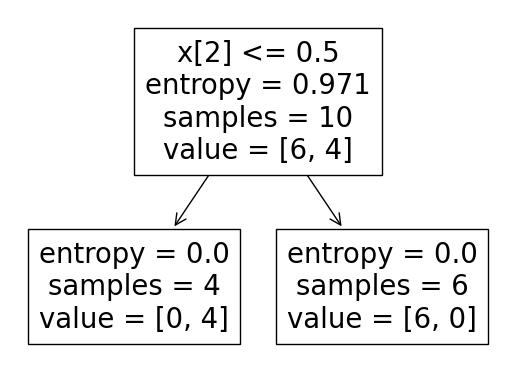

In [ ]:

dogs_clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
dogs_clf.fit(X, y)

tree.plot_tree(dogs_clf.fit(X, y))

# получаем массив получившися энтропий - какая была в самом начале, какая получилась слева и справа после сплитования
entropy_arr = dogs_clf.tree_.impurity
# получаем массив значений
value_arr = dogs_clf.tree_.value

# считаем энтропию после сплита
entropy_cur = -sum(value_arr[1][0]) / data_dnc.shape[0] * entropy_arr[1] + sum(value_arr[2][0]) / data_dnc.shape[0] * entropy_arr[2]

# считаем базовую энтропию, хотя, ее можно получить из массива entropy_arr - entropy_arr[0]. Но, для наглядности
# проведем расчет
a = [i for i in data_dnc["Вид"].value_counts()]
entropy_base = round( \
    -(a[0] / data_dnc.shape[0] * np.log2(a[0] / data_dnc.shape[0])) - (a[1] / data_dnc.shape[0] * np.log2(a[1] / data_dnc.shape[0])), 2)

# выведем результат
print(round((entropy_base - entropy_cur) * 100) / 100)